In [12]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [3]:
model = tf.keras.models.load_model("../../models/cnn/self_driving_car")

In [9]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

def equalize(image):
    return cv2.equalizeHist(image)

def normalize(image):
    return image / 255

def preprocessing(image):
    image = grayscale(image)
    image = equalize(image)
    return normalize(image)

In [15]:
def is_grayscale(image):
    return True if len(image.shape) < 3 else False

def show_grayscale_image(image):
    plt.imshow(image, cmap="gray")
    plt.axis('off')
    plt.show()
    
def show_rgb_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()
    
def show_image(image):
    if is_grayscale(image):
        show_grayscale_image(image)
    else:
        show_rgb_image(image)

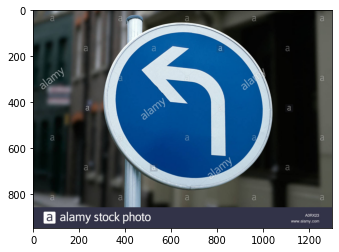

In [29]:
import requests
from PIL import Image

# https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg
# https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg
# https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg
# https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg
# https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg

url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)
predicted sign: [11]
ClassId                                        11
SignName    Right-of-way at the next intersection
Name: 11, dtype: object


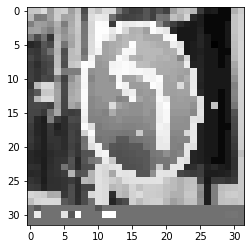

In [30]:
#Preprocess image
 
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
 
#Reshape reshape
 
img = img.reshape(1, 32, 32, 1)
 
#Test image
print("predicted sign: "+ str(model.predict_classes(img)))

data_location = './../../data/self_driving_car/german_traffic_signs/'
data = pd.read_csv(data_location + 'signnames.csv')
print(data.iloc[model.predict_classes(img)[0]])